In [2]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn.utils import shuffle
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.model_selection import validation_curve, ValidationCurveDisplay
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings


learning on dataset Iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.504185
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.503452
training: adam
Training set score: 0.980000
Training set loss: 0.045311

learning on dataset Breast Cancer
training: constant learning-rate
Training set score: 0.984183
Training set loss: 0.064651
training: constant with momentum
Training set score: 0.989455
Training set loss: 0.044569
training: constant with Nesterov's momentum
Training set score: 0.980668
Training set loss: 0.056754
training: inv-s

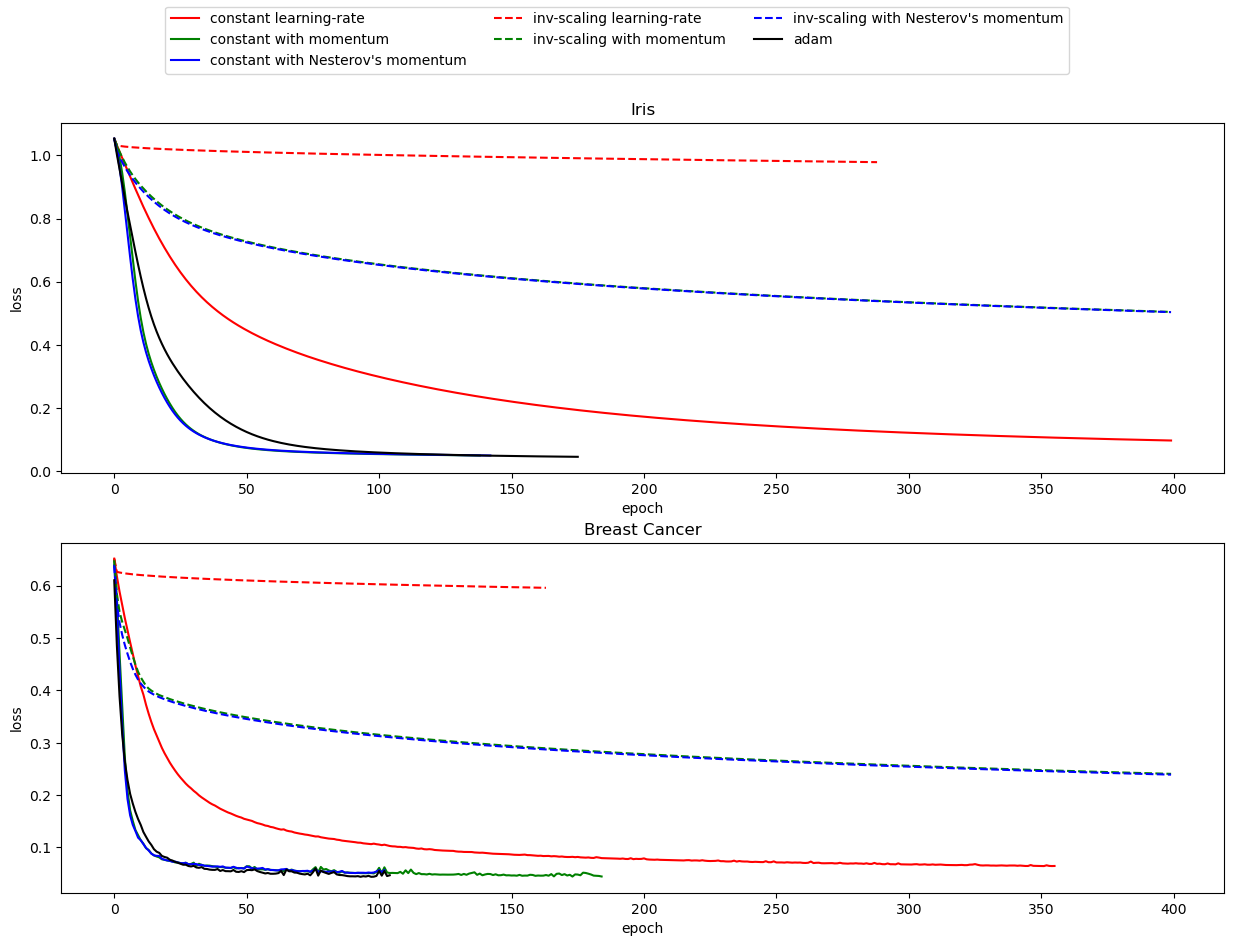

In [36]:
# Plotting loss curves

# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, figsize=(15,10))
# load / generate some toy datasets
iris = datasets.load_iris()
bc = datasets.load_breast_cancer()
data_sets = [
    (iris.data, iris.target),
    (bc.data, bc.target),
]

for ax, data, name in zip(
    axes.ravel(), data_sets, ["Iris", "Breast Cancer"]
):
    ax.set_xlabel("epoch")
    ax.set_ylabel("loss")
    plot_on_dataset(*data, ax=ax, name=name)
    

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

CV train 1.0


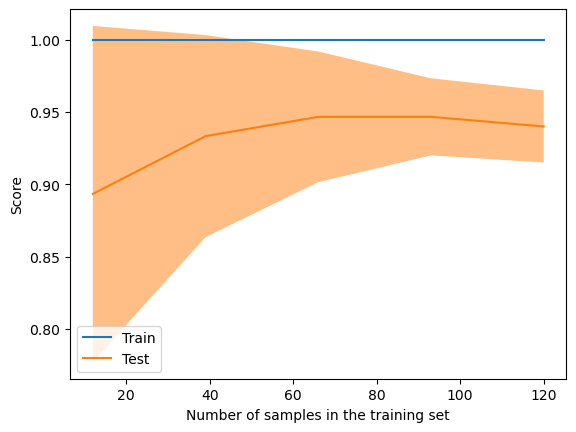

CV mean score with default params is  0.9400000000000001


C:\Users\jmaal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jmaal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jmaal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [ ]:
# Iris with default params

# shuffle dataset
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X,y, random_state=0)
X = StandardScaler().fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y)


clf = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,200,200,200,200),
    random_state=0, early_stopping = True)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
cv_results = cross_validate(clf, X, y, return_train_score = True)
train_scores = cv_results['train_score']

print("CV train", train_scores.mean())

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(clf, X, y)
display = LearningCurveDisplay(train_sizes=train_sizes,
                               train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()


# Default params score
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
print("CV mean score with default params is ", scores.mean())


#validation curves

clf = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,200,200,200,200),
    random_state=0, early_stopping = True, max_iter = 500)
ValidationCurveDisplay.from_estimator(
   clf, X, y, param_name="alpha", param_range= np.logspace(-5, 2)
)

clf = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,200,200,200,200),
    random_state=0, early_stopping = True, max_iter = 300)
ValidationCurveDisplay.from_estimator(
   clf, X, y, param_name="learning_rate_init", param_range= np.logspace(-5, -2)
)


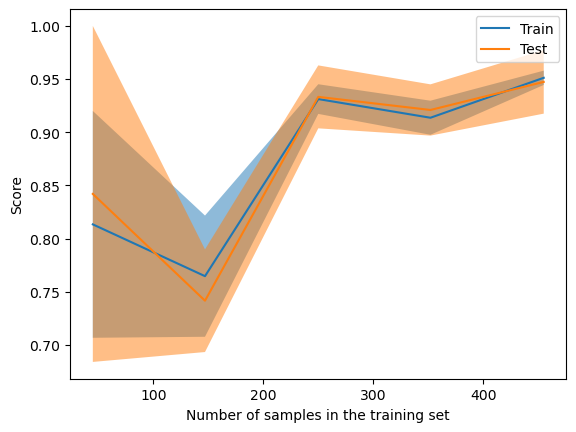

CV mean score with default params is  0.947352895513119


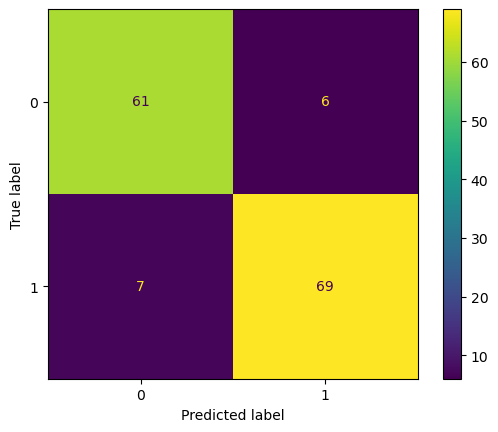

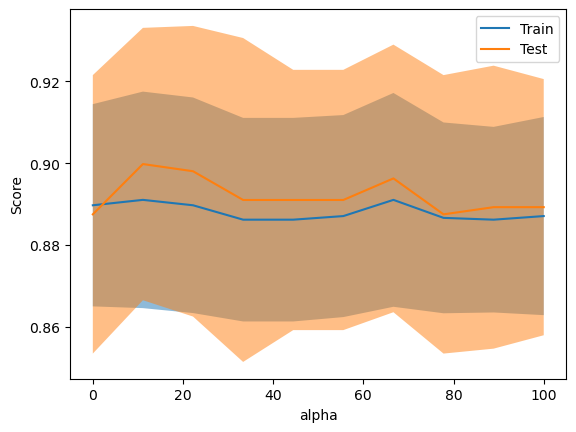

In [29]:
# BC Curves

# shuffle dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X,y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y)

# train learner
# clf = MLPClassifier(random_state=0, early_stopping = True)
clf = make_pipeline(StandardScaler(), MLPClassifier(random_state=0, early_stopping = True))
clf.fit(X,y)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(clf, X, y)
display = LearningCurveDisplay(train_sizes=train_sizes,
                               train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()


# Default params score
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
print("CV mean score with default params is ", scores.mean())

# Confusion Matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
cm_disp.plot()
plt.show()


#validation curve 
clf = MLPClassifier(random_state=0, early_stopping = True)
ValidationCurveDisplay.from_estimator(
   clf, X, y, param_name="alpha", param_range= np.linspace(0.00001, 100, 10)
)

In [43]:
# grid search params
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X)

params = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'], 
    'alpha' : np.linspace(0.00001, 100, 10),
    'learning_rate': ['constant', 'adaptive'],
    'early_stopping': [True]
}

gs = GridSearchCV(estimator= MLPClassifier(), param_grid= params)

X_train, X_test, y_train, y_test = train_test_split(X, y)
p = gs.fit(X_train, y_train)
print("optimal iris params", p.best_params_)

# bc

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X)

params = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'], 
    'alpha' : np.linspace(0.00001, 100, 10),
    'learning_rate': ['constant', 'adaptive'],
    'early_stopping': [True]
}

gs = GridSearchCV(estimator= MLPClassifier(), param_grid= params)

X_train, X_test, y_train, y_test = train_test_split(X, y)
p = gs.fit(X_train, y_train)
print("optimal bc params", p.best_params_)

optimal iris params {'activation': 'tanh', 'alpha': 1e-05, 'early_stopping': True, 'learning_rate': 'constant'}
optimal bc params {'activation': 'identity', 'alpha': 11.11112, 'early_stopping': True, 'learning_rate': 'adaptive'}


In [18]:
# iris optimal params

X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf_iris = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,),
    random_state=0, early_stopping = True)

clf_iris.fit(X_train, y_train)
cv_results_iris = cross_validate(clf_iris, X, y)
test_score_iris = cv_results_iris['test_score'].mean()
fit_time_iris = cv_results_iris['fit_time'].mean()

print("CV test score:", test_score_iris)
print("training time:", fit_time_iris)

CV test score: 0.9733333333333333
training time: 0.08310866355895996


In [10]:
# BC optimal params

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf_bc = MLPClassifier(activation = 'tanh', 
        learning_rate = 'adaptive',
        alpha = .01,
        solver ='adam',
        hidden_layer_sizes = (100,100,100),
        random_state=0, early_stopping = True)

cv_results_bc = cross_validate(clf_bc, X, y)
f1_results = cross_validate(clf_bc, X, y, scoring = 'f1')
test_score_bc = cv_results_bc['test_score'].mean()
f1_score = f1_results['test_score'].mean()
fit_time_bc = cv_results_bc['fit_time'].mean()

print("CV test score:", test_score_bc)
print("F1 test score:", f1_score)
print("training time:", fit_time_bc)

CV test score: 0.9754230709517155
F1 test score: 0.9805284120837687
training time: 0.16319808959960938


<Figure size 1000x1000 with 0 Axes>

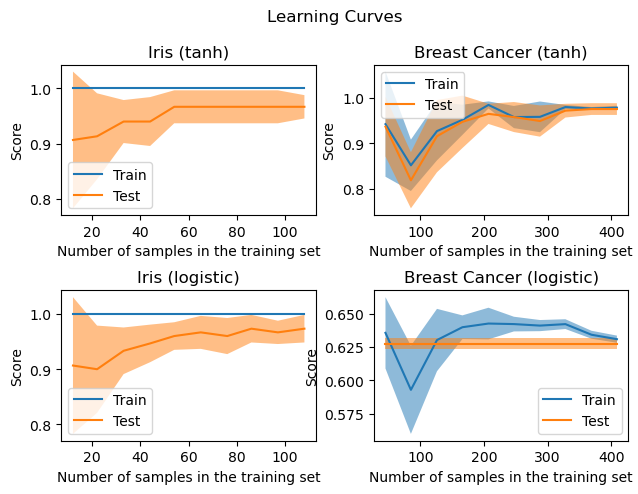

In [25]:
# learning curves

# Generate final plots

iris_x, iris_y = datasets.load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)
iris_x = StandardScaler().fit_transform(iris_x) 

bc_x, bc_y = datasets.load_breast_cancer(return_X_y=True)
bc_x, bc_y = shuffle(bc_x, bc_y, random_state=0)
bc_x = StandardScaler().fit_transform(bc_x) 

clf_iris = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,),
    random_state=0, early_stopping = True)

clf_bc = MLPClassifier(activation = 'tanh', 
        learning_rate = 'adaptive',
        alpha = .01,
        solver ='adam',
        hidden_layer_sizes = (100,100,100),
        random_state=0, early_stopping = True)



# learning curves
plt.figure(figsize=(10,10))
plt.tight_layout()
fig1, axs1 = plt.subplots(2,2)
fig1.suptitle("Learning Curves")
axs1[0,0].set_title("Iris (tanh)")
axs1[0,1].set_title("Breast Cancer (tanh)")
axs1[1,0].set_title("Iris (logistic)")
axs1[1,1].set_title("Breast Cancer (logistic)")

plt.tight_layout()
fig1.subplots_adjust(hspace = .5)

LearningCurveDisplay.from_estimator(MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,),
    random_state=0, early_stopping = True)
                                    , iris_x, iris_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[0,0])

LearningCurveDisplay.from_estimator(MLPClassifier(activation = 'tanh', 
        learning_rate = 'constant',
        alpha = .01,
        solver ='adam',
        hidden_layer_sizes = (100,100,100),
        random_state=0, early_stopping = True), 
                                    bc_x, bc_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[0,1])

LearningCurveDisplay.from_estimator(MLPClassifier(activation = 'logistic', 
                        learning_rate = 'adaptive',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,),
    random_state=0, early_stopping = True), iris_x, iris_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[1,0])
LearningCurveDisplay.from_estimator( MLPClassifier(activation = 'logistic', 
        learning_rate = 'adaptive',
        alpha = .01,
        solver ='adam',
        hidden_layer_sizes = (100,100,100),
        random_state=0, early_stopping = True), 
                                    bc_x, bc_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[1,1])





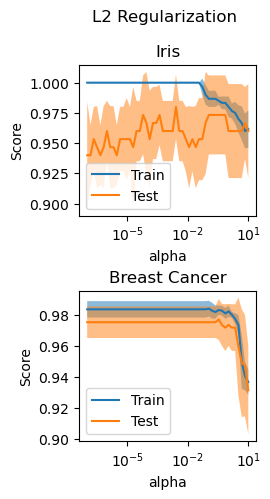

In [24]:
# Validation curves
# Generate final plots

iris_x, iris_y = datasets.load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)
iris_x = StandardScaler().fit_transform(iris_x) 

bc_x, bc_y = datasets.load_breast_cancer(return_X_y=True)
bc_x, bc_y = shuffle(bc_x, bc_y, random_state=0)
bc_x = StandardScaler().fit_transform(bc_x) 

clf_iris = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,),
    random_state=0, early_stopping = True, max_iter = 500)

clf_bc = MLPClassifier(activation = 'tanh', 
        learning_rate = 'adaptive',
        solver ='adam',
        hidden_layer_sizes = (100,100,100),
        random_state=0, early_stopping = True, max_iter = 500)

fig2, axs2 = plt.subplots(2)
fig2.suptitle("L2 Regularization")
axs2[0].set_title("Iris")
axs2[1].set_title("Breast Cancer")
fig2.tight_layout()
fig2.set_figwidth(2)
fig2.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(
   clf_iris, iris_x, iris_y, param_name="alpha", param_range= np.logspace(-7, 1), ax = axs2[0]
)

ValidationCurveDisplay.from_estimator(
   clf_bc, bc_x, bc_y, param_name="alpha", param_range= np.logspace(-7, 1), ax = axs2[1]
)



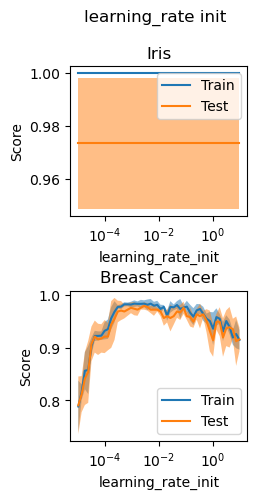

In [31]:
# Validation curves
# Generate final plots

iris_x, iris_y = datasets.load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)
iris_x = StandardScaler().fit_transform(iris_x) 

bc_x, bc_y = datasets.load_breast_cancer(return_X_y=True)
bc_x, bc_y = shuffle(bc_x, bc_y, random_state=0)
bc_x = StandardScaler().fit_transform(bc_x) 

clf_iris = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,),
    random_state=0, early_stopping = True, max_iter = 500)

clf_bc = MLPClassifier(activation = 'tanh', 
        learning_rate = 'adaptive',
        alpha = .01,
        solver ='adam',
        hidden_layer_sizes = (100,100,100),
        random_state=0, early_stopping = True, max_iter = 500)

fig2, axs2 = plt.subplots(2)
fig2.suptitle("learning_rate init")
axs2[0].set_title("Iris")
axs2[1].set_title("Breast Cancer")
fig2.tight_layout()
fig2.set_figwidth(2)
fig2.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(
  clf_iris, iris_x, iris_y, param_name="learning_rate_init", param_range= np.logspace(-5, 1),
    ax = axs2[0]
)

ValidationCurveDisplay.from_estimator(
  clf_bc, bc_x, bc_y, param_name="learning_rate_init", param_range= np.logspace(-5, 1),
    ax= axs2[1]
)
